<a href="https://colab.research.google.com/github/Anastasiia241297/LR6-ML/blob/main/_ml_mai_sber_decision_trees_lab6_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


### О ЛР:

- scikit-learn & decision trees
- Coding decision tree & Categorical features


----

#### Самостоятельная оценка результатов

Для удобства проверки, исходя из набора решенных задач, посчитайте свою максимальную оценку.

**Оценка**:

***DeadLine - 21.05.2024 23:59***

### Формат сдачи
Задания сдаются через lms. Вы прикрепляете **ССЫЛКУ НА ПУБЛИЧНЫЙ РЕПОЗИТОРИЙ**, где выполнено ваше задание. Иначе задание не проверяется.




### Оценивание и штрафы


Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 5 баллов.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты не могут получить за него больше 0 баллов.

Неэффективная реализация кода может негативно отразиться на оценке.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from matplotlib.colors import Colormap, ListedColormap
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns

sns.set(style="whitegrid")

import warnings

warnings.filterwarnings("ignore")

# 1. Решающие деревья. Визуализация.

В этой части мы рассмотрим два простых двумерных датасета сделанных с помощью `make_moons`, `make_circles` и посмотрим как ведет себя разделяющая поверхность в зависимости от различных гиперпараметров.

In [ ]:
from sklearn.datasets import make_moons, make_circles, make_classification

datasets = [
    make_circles(noise=0.2, factor=0.5, random_state=42),
    make_moons(noise=0.2, random_state=42),
    make_classification(
        n_classes=3,
        n_clusters_per_class=1,
        n_features=2,
        class_sep=0.8,
        random_state=3,
        n_redundant=0,
    ),
]

In [ ]:
palette = sns.color_palette(n_colors=3)
cmap = ListedColormap(palette)

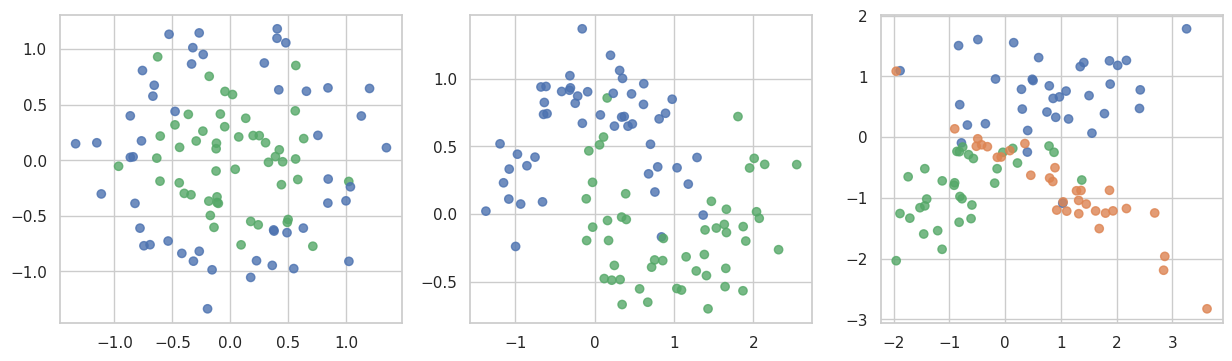

In [ ]:
plt.figure(figsize=(15, 4))
for i, (x, y) in enumerate(datasets):
    plt.subplot(1, 3, i + 1)
    plt.scatter(x[:, 0], x[:, 1], c=y, cmap=cmap, alpha=0.8)

__Задание 1. [0.5 балла]__

Для каждого датасета обучите решающее дерево с параметрами по умолчанию, предварительно разбив выборку на обучающую и тестовую. Постройте разделящие поверхности (для этого воспользуйтесь функцией `plot_surface`, пример ниже). Посчитайте accuracy на обучающей и тестовой выборках. Сильно ли деревья переобучились?

In [ ]:
def plot_surface(clf, X, y):
    plot_step = 0.01
    palette = sns.color_palette(n_colors=len(np.unique(y)))
    cmap = ListedColormap(palette)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, plot_step), np.arange(y_min, y_max, plot_step)
    )
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.3)

    plt.scatter(
        X[:, 0],
        X[:, 1],
        c=y,
        cmap=cmap,
        alpha=0.7,
        edgecolors=np.array(palette)[y],
        linewidths=2,
    )

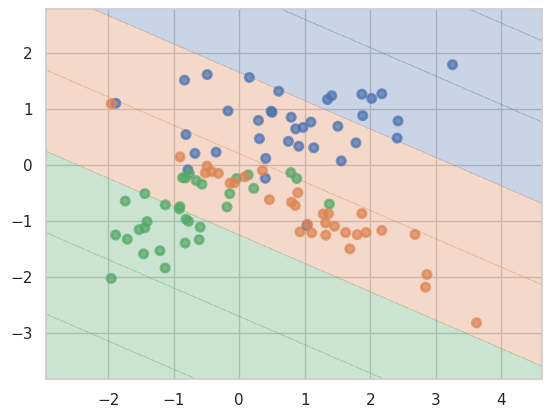

In [ ]:
# Пример:
from sklearn.linear_model import LinearRegression

X, y = datasets[2]
lr = LinearRegression().fit(X, y)
plot_surface(lr, X, y)

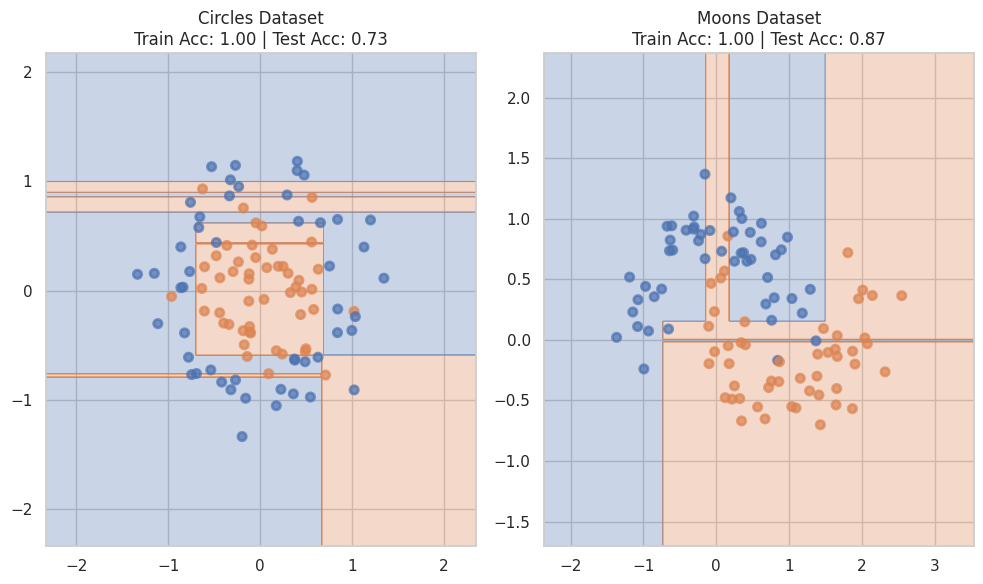

In [ ]:
from sklearn.metrics import accuracy_score

datasets = [
    ("Circles Dataset", make_circles(noise=0.2, factor=0.5, random_state=42)),
    ("Moons Dataset", make_moons(noise=0.2, random_state=42)),
]

# Разделение данных, обучение модели, расчет точности и визуализация разделяющих поверхностей
plt.figure(figsize=(10, 6))

for i, (title, (X, y)) in enumerate(datasets):
    # Разделение на обучающую и тестовую выборки
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Обучение модели с параметрами по умолчанию
    clf = DecisionTreeClassifier(random_state=42)
    clf.fit(X_train, y_train)

    # Расчет точности
    train_accuracy = accuracy_score(y_train, clf.predict(X_train))
    test_accuracy = accuracy_score(y_test, clf.predict(X_test))

    # Визуализация
    plt.subplot(1, 2, i + 1)
    plot_surface(clf, X, y)
    plt.title(f"{title}\nTrain Acc: {train_accuracy:.2f} | Test Acc: {test_accuracy:.2f}")

plt.tight_layout()
plt.show()



Решающие деревья на этих датасетах явно переобучились, особенно на Circles Dataset, где разница в точности между обучающей и тестовой выборками значительна.

__Задание 2. [0.75 балла]__

Попробуйте перебрать несколько параметров для регуляризации (напр. `max_depth`, `min_samples_leaf`). Для каждого набора гиперпараметров постройте разделяющую поверхность, выведите обучающую и тестовую ошибки. Можно делать кросс-валидацию или просто разбиение на трейн и тест, главное делайте каждый раз одинаковое разбиение, чтобы можно было корректно сравнивать (помните же, что итоговое дерево сильно зависит от небольшого изменения обучающей выборки?). Проследите как меняется разделяющая поверхность и обобщающая способность. Почему так происходит, одинаково ли изменение для разных датасетов?


=== Circles Dataset ===


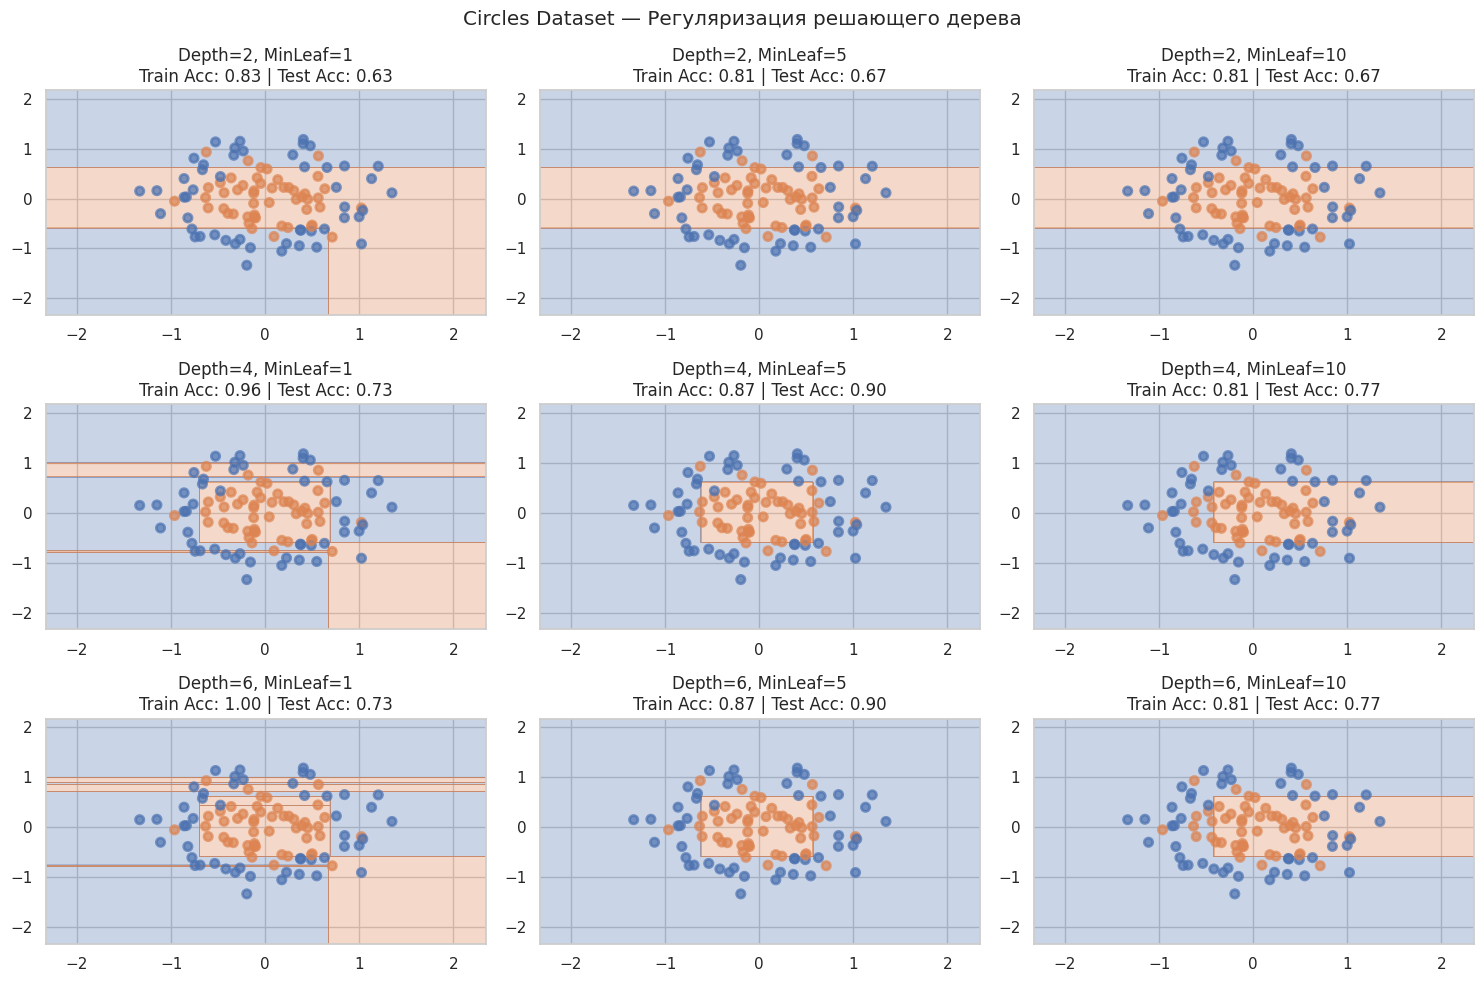


=== Moons Dataset ===


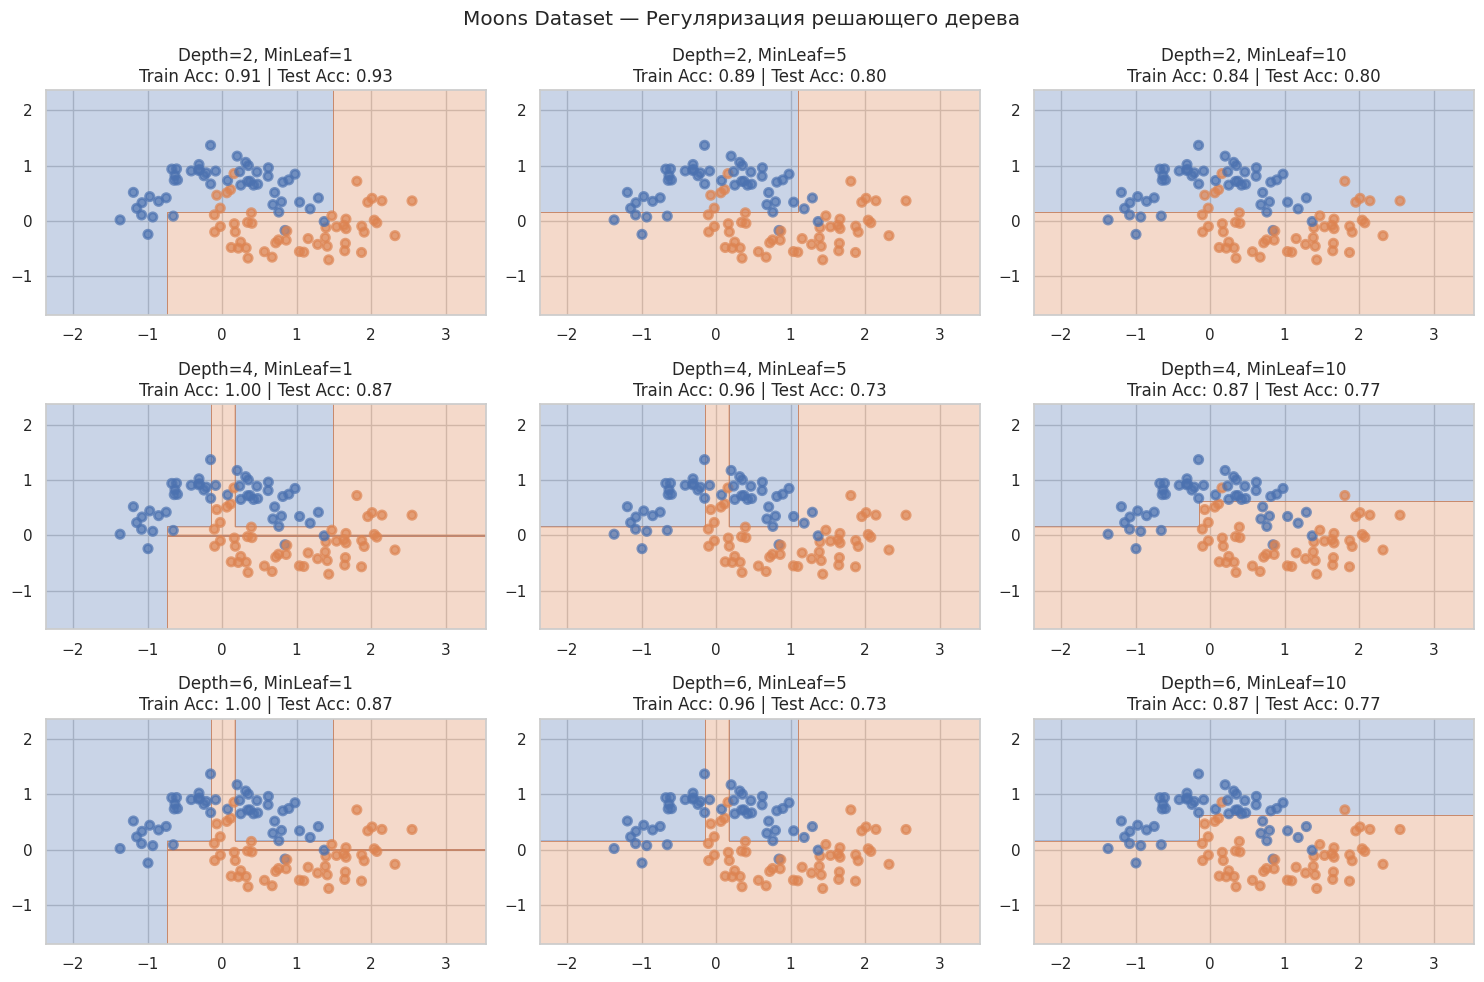

In [ ]:
# Фиксированные параметры для перебора
depths = [2, 4, 6]  # Глубина дерева
min_samples = [1, 5, 10]  # Минимальное количество выборок в листе

# Оставляем два датасета
datasets = [
    ("Circles Dataset", make_circles(noise=0.2, factor=0.5, random_state=42)),
    ("Moons Dataset", make_moons(noise=0.2, random_state=42)),
]

# Визуализация результатов
for name, (X, y) in datasets:
    print(f"\n=== {name} ===")
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    plt.figure(figsize=(15, 10))
    idx = 1

    for max_depth in depths:
        for min_samples_leaf in min_samples:
            # Обучение модели
            clf = DecisionTreeClassifier(max_depth=max_depth, min_samples_leaf=min_samples_leaf, random_state=42)
            clf.fit(X_train, y_train)

            # Ошибки
            train_acc = accuracy_score(y_train, clf.predict(X_train))
            test_acc = accuracy_score(y_test, clf.predict(X_test))

            # Визуализация разделяющей поверхности
            plt.subplot(len(depths), len(min_samples), idx)
            plot_surface(clf, X, y)
            plt.title(
                f"Depth={max_depth}, MinLeaf={min_samples_leaf}\nTrain Acc: {train_acc:.2f} | Test Acc: {test_acc:.2f}"
            )
            idx += 1

    plt.suptitle(f"{name} — Регуляризация решающего дерева")
    plt.tight_layout()
    plt.subplots_adjust(top=0.9)
    plt.show()


С увеличением глубины и уменьшением min_samples_leaf модель склонна к переобучению, особенно на датасете Circles. Регуляризация (сглаживание) с min_samples_leaf=5 и ограничением глубины помогает улучшить обобщающую способность на обоих датасетах.


# 2. Решающие деревья своими руками

В этой части вам нужно реализовать свой класс для обучения решающего дерева в задаче бинарной классификации с возможностью обработки вещественных и категориальных признаков.

__Задание 3. [0.75 балл]__

Реализуйте функцию `find_best_split` из модуля `tree_code.py`

In [ ]:
import numpy as np
from collections import Counter


def find_best_split(feature_vector, target_vector):
    """
    Находит оптимальный порог для разбиения вектора признака по критерию Джини.

    Parameters
    ----------
    feature_vector : np.ndarray
        Вектор вещественнозначных значений признака.
    target_vector : np.ndarray
        Вектор классов объектов (0 или 1), длина `feature_vector` равна длине `target_vector`.

    Returns
    -------
    thresholds : np.ndarray
        Отсортированный по возрастанию вектор со всеми возможными порогами, по которым объекты можно разделить.
    ginis : np.ndarray
        Вектор со значениями критерия Джини для каждого порога в `thresholds`.
    threshold_best : float
        Оптимальный порог для разбиения.
    gini_best : float
        Оптимальное значение критерия Джини.
    """

    # Сортируем вектор признаков и соответствующие метки
    sorted_indices = np.argsort(feature_vector)
    sorted_features = feature_vector[sorted_indices]
    sorted_targets = target_vector[sorted_indices]

    # Находим все возможные пороги как среднее двух соседних значений
    unique_features = np.unique(sorted_features)
    if len(unique_features) == 1:  # Если признак константен
        return np.array([]), np.array([]), None, None

    thresholds = (sorted_features[1:] + sorted_features[:-1]) / 2
    thresholds = np.unique(thresholds)  # Исключаем дублирующиеся пороги

    ginis = []
    n = len(target_vector)

    # Подсчёт общего количества классов
    total_count = Counter(sorted_targets)
    total_left = [0, 0]
    total_right = [total_count[0], total_count[1]]

    # Проходим по каждому порогу и считаем Джини
    left_size = 0
    right_size = n

    for threshold in thresholds:
        # Двигаем границу и обновляем распределение классов
        while left_size < n and sorted_features[left_size] <= threshold:
            label = sorted_targets[left_size]
            total_left[label] += 1
            total_right[label] -= 1
            left_size += 1
            right_size -= 1

        # Вычисляем энтропию Джини для левой и правой частей
        gini_left = 1.0 - (total_left[0] / left_size)**2 - (total_left[1] / left_size)**2 if left_size > 0 else 0
        gini_right = 1.0 - (total_right[0] / right_size)**2 - (total_right[1] / right_size)**2 if right_size > 0 else 0

        # Считаем взвешенное значение Джини
        gini = (left_size / n) * gini_left + (right_size / n) * gini_right
        ginis.append(gini)

    # Конвертируем результаты в numpy массивы
    ginis = np.array(ginis)
    best_index = np.argmin(ginis)
    gini_best = ginis[best_index]
    threshold_best = thresholds[best_index]

    return thresholds, ginis, threshold_best, gini_best


__Задание 4. [0.25 балла]__

`students.csv` - это преобразованный датасет [User Knowledge](https://archive.ics.uci.edu/ml/datasets/User+Knowledge+Modeling)). Первые пять столбцов содержат признаки каждого объекта, а последний столбец — целевую переменную (класс: 0 или 1). Нужно построить график, который на одном изображении отобразит пять кривых "порог — значение критерия Джини" для всех пяти признаков. Кроме того, стоит отдельно визуализировать scatter-графики "значение признака — класс" для каждого из пяти признаков.

Это нужно и для выявления значимости признаков, и для пороговых значений. Да и глазу приятно

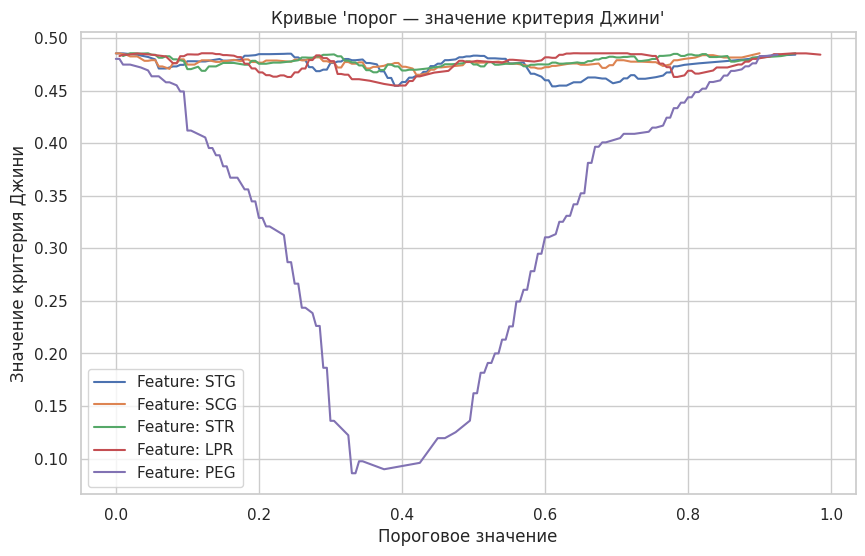

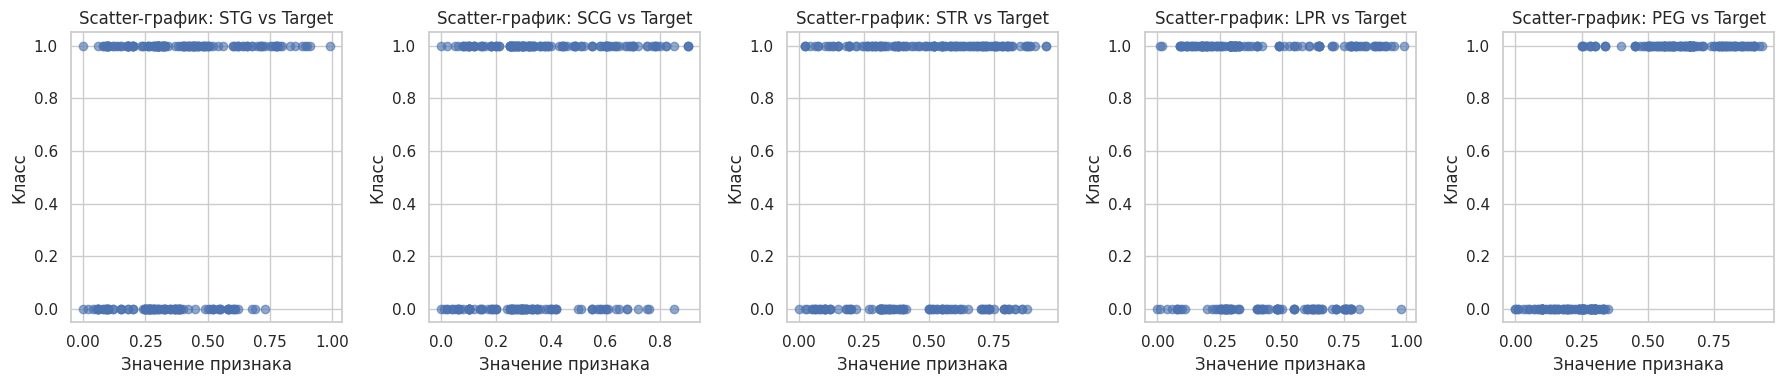

In [ ]:
# Загрузка данных
data = pd.read_csv("students.csv")

# Определяем признаки и целевую переменную
features = data.columns[:-1]  # первые пять столбцов
target = data.columns[-1]     # последний столбец

# График 1: Кривые Джини
plt.figure(figsize=(10, 6))  # создаем отдельную фигуру
for feature in features:
    thresholds, ginis, _, _ = find_best_split(data[feature].values, data[target].values)
    plt.plot(thresholds, ginis, label=f'Feature: {feature}')

plt.title("Кривые 'порог — значение критерия Джини'")
plt.xlabel("Пороговое значение")
plt.ylabel("Значение критерия Джини")
plt.legend()
plt.show()

# График 2: Scatter-плоты для каждого признака
fig, axes = plt.subplots(1, len(features), figsize=(18, 4))  # создаем несколько осей для scatter-плотов
for i, feature in enumerate(features):
    axes[i].scatter(data[feature], data[target], alpha=0.6)
    axes[i].set_title(f"Scatter-график: {feature} vs Target")
    axes[i].set_xlabel("Значение признака")
    axes[i].set_ylabel("Класс")

plt.tight_layout()
plt.show()



__Задание 5. [0.25 балла]__

На основании кривых критерия Джини, по какому признаку стоит разделить выборку на два поддерева? Совпадает ли этот выбор с визуальной оценкой scatter-графиков? Как бы вы описали вид кривой для "хороших" признаков, по которым выборка делится почти идеально, и чем кривые таких признаков отличаются от кривых признаков, по которым разделение практически невозможно?

Признак PEG является лучшим для разделения выборки, так как его кривая Джини имеет глубокое минимальное значение (около 0.1), что совпадает с визуальной оценкой scatter-графика — классы 0 и 1 разделены четко. Для "хороших" признаков кривая Джини демонстрирует резкий спад и глубокий минимум, указывая на сильную способность разделять выборку. У "плохих" признаков кривая остается плавной, без ярко выраженного минимума, что говорит о слабом разделении.

__Задание 6. [0.75 балла].__

Разберитесь с уже написанным кодом в классе DecisionTree модуля tree_code.py. Найдите ошибки в реализации метода \_fit_node. Напишите функцию \_predict_node.

 Построение дерева осуществляется согласно базовому жадному алгоритму, предложенному в лекции. Выбор лучшего разбиения необходимо производить по критерию Джини. Критерий останова: все объекты в листе относятся к одному классу или ни по одному признаку нельзя разбить выборку. Ответ в листе: наиболее часто встречающийся класс в листе. Для категориальных признаков выполняется преобразование, описанное в лекции в разделе «Учет категориальных признаков».




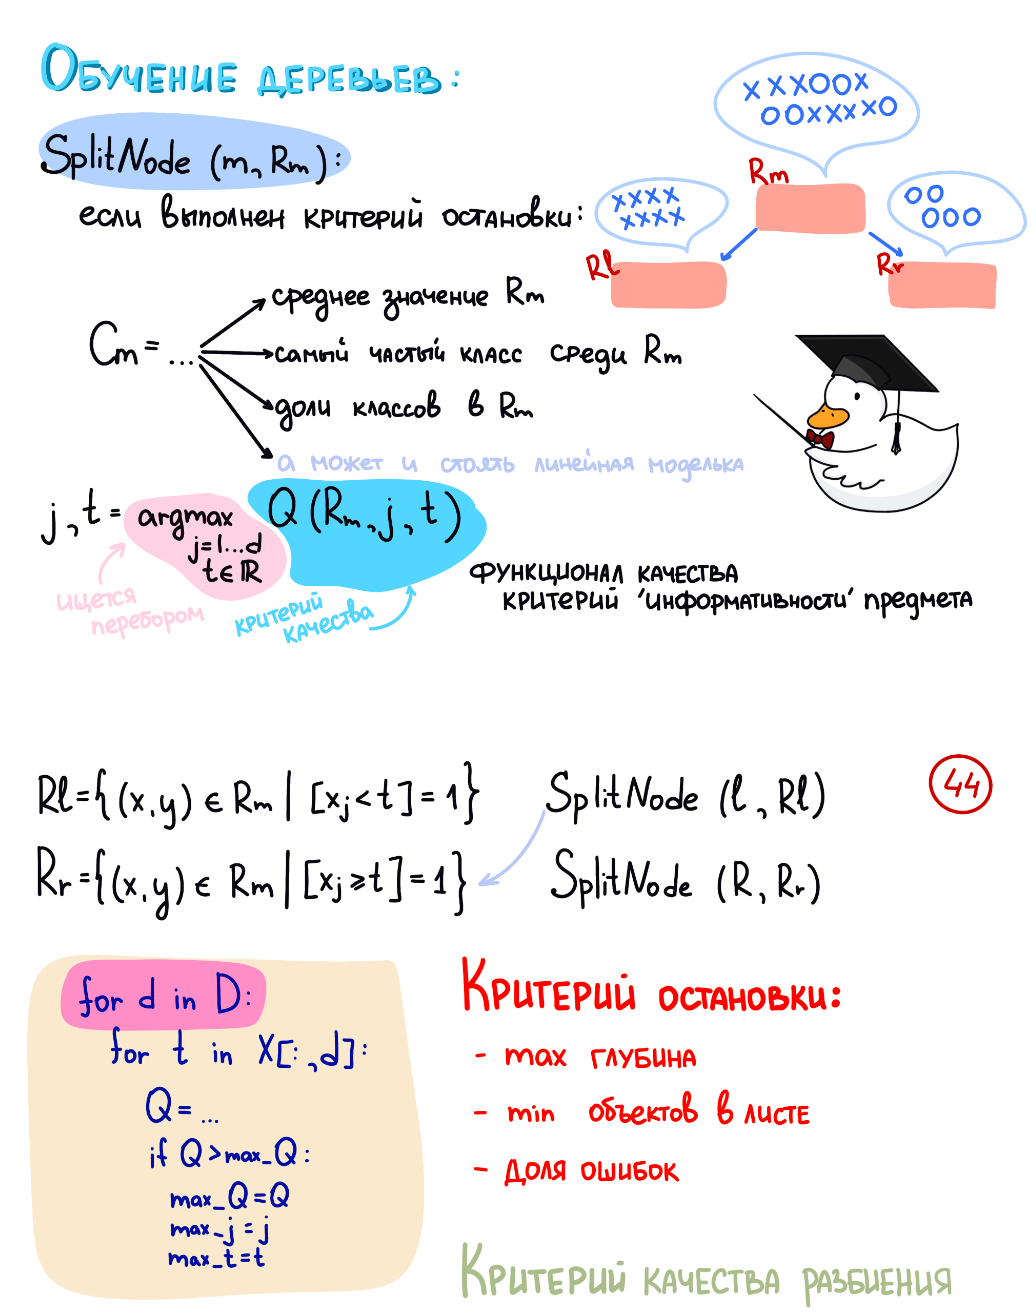

__Задание 7. [0.25 балла]__

Протестируйте свое решающее дерево на датасете [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom). Вам нужно открыть` agaricus-lepiota.data`, прочитать ее с помощью pandas (не забудьте про `agaricus-lepiota.names`), применить к каждому столбцу LabelEncoder (из sklearn), чтобы преобразовать строковые имена категорий в натуральные числа. Первый столбец — это целевая переменная (e — edible, p — poisonous) Мы будем измерять качество с помощью accuracy, так что нам не очень важно, что будет классом 1, а что — классом 0. Обучите решающее дерево на половине случайно выбранных объектов (признаки в датасете категориальные) и сделайте предсказания для оставшейся половины. Вычислите accuracy.

_SPOILER: У вас должно получиться значение accuracy, равное единице (или очень близкое к единице), и не очень глубокое дерево_

In [ ]:
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv('agaricus-lepiota.data', delimiter=',')
label_encoder = LabelEncoder()
for column in df.columns:
    df[column] = label_encoder.fit_transform(df[column])
df.head()

,p,x,s,n,t,p.1,f,c,n.1,k,...,s.2,w,w.1,p.2,w.2,o,p.3,k.1,s.3,u
0,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
1,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
2,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
3,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1
4,0,5,3,9,1,0,1,0,0,5,...,2,7,7,0,2,1,4,2,2,1


In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier

# Чтение данных
df = pd.read_csv('agaricus-lepiota.data', delimiter=',', header=None)

# Преобразование категориальных признаков в числовые с использованием LabelEncoder
label_encoder = LabelEncoder()
for column in df.columns:
    df[column] = label_encoder.fit_transform(df[column])

# Разделение на признаки (X) и целевую переменную (y)
X = df.iloc[:, 1:].values  # Все столбцы, кроме первого (целевой переменной)
y = df.iloc[:, 0].values   # Целевая переменная (первый столбец)

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# Создание модели дерева решений с параметрами для улучшения точности
model = DecisionTreeClassifier(max_depth=5, min_samples_leaf=10, class_weight='balanced', random_state=42)

# Кросс-валидация для оценки качества модели
cv_scores = cross_val_score(model, X_train, y_train, cv=5)
print(f"Средняя точность при кросс-валидации: {cv_scores.mean():.3f}")

# Обучение модели на обучающих данных
model.fit(X_train, y_train)

# Прогнозирование на тестовых данных
y_pred = model.predict(X_test)

# Оценка точности модели
accuracy = accuracy_score(y_test, y_pred)
print(f"Точность модели: {accuracy:.3f}")


Средняя точность при кросс-валидации: 0.970
Точность модели: 0.976


__Задание 8. [1 балл]__

Загрузите следующие наборы данных, предварительно ознакомившись с описанием признаков и целевой переменной в каждом из них (она записаны в Data Folder, в файле *.names):
* [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom) (загрузили в предыдущем пункте, классы записаны в нулевом столбце)
* [tic-tac-toe](https://archive.ics.uci.edu/ml/datasets/Tic-Tac-Toe+Endgame) (классы записаны в последнем столбце, датасет лежит на гитхабе вместе с заданием)
* [cars](https://archive.ics.uci.edu/ml/datasets/Car+Evaluation) (классы записаны в последнем столбце, считаем что unacc, acc — это класс 0, good, vgood — класс 1)
* [nursery](https://archive.ics.uci.edu/ml/datasets/Nursery) (классы записаны в последнем столбце, считаем, что not_recom и recommend — класс 0, very_recom, priority, spec_prior — класс 1).

**Задача**:

Закодировать категориальные признаки в наборе данных с использованием `LabelEncoder`. Затем, применив `cross_val_score` (cv=10), оценить метрику accuracy для следующих алгоритмов:

1. **DecisionTree**, обрабатывающий все признаки как вещественные.
2. **DecisionTree**, обрабатывающий все признаки как категориальные.
3. **DecisionTree**, обрабатывающий все признаки как вещественные + one-hot encoding всех признаков.
4. **DecisionTreeClassifier** из `sklearn`.

**Инструкция**:
1. Закодировать категориальные признаки с помощью `LabelEncoder`.
2. Оценить accuracy, используя `cross_val_score` (cv=10) и `scoring=make_scorer(accuracy_score)`.
3. Если позволяет память, установить параметр `sparse=False` в `OneHotEncoder`.
4. Результаты сохранить в `pd.DataFrame` (по строкам — наборы данных, по столбцам — алгоритмы).

**Рекомендации**:
- Для вычисления точности используйте `scoring=make_scorer(accuracy_score)` из `sklearn.metrics`.

In [ ]:
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import cross_val_score


# Функция для загрузки и подготовки данных
def load_and_process_data(dataset_name):
    if dataset_name == "mushrooms":
        url = "https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data"
        column_names = ["class", "cap-shape", "cap-surface", "cap-color", "bruises", "odor",
                        "gill-attachment", "gill-spacing", "gill-size", "gill-color",
                        "stalk-shape", "stalk-root", "stalk-surface-above-ring",
                        "stalk-surface-below-ring", "stalk-color-above-ring",
                        "stalk-color-below-ring", "veil-type", "veil-color", "ring-number",
                        "ring-type", "spore-print-color", "population", "habitat"]
    elif dataset_name == "tic-tac-toe":
        url = "https://archive.ics.uci.edu/ml/machine-learning-databases/tic-tac-toe/tic-tac-toe.data"
        column_names = ["top-left", "top-middle", "top-right", "middle-left", "middle-middle",
                        "middle-right", "bottom-left", "bottom-middle", "bottom-right", "class"]
    elif dataset_name == "cars":
        url = "https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data"
        column_names = ["buying", "maint", "doors", "persons", "lug_boot", "safety", "class"]
    elif dataset_name == "nursery":
        url = "https://archive.ics.uci.edu/ml/machine-learning-databases/nursery/nursery.data"
        column_names = ["parents", "has_nurs", "form", "children", "housing", "finance",
                        "social", "health", "class"]
    else:
        raise ValueError("Dataset not recognized.")

    # Загрузка данных
    data = pd.read_csv(url, names=column_names)

    # Классы: перекодирование для cars и nursery
    if dataset_name == "cars":
        data["class"] = data["class"].apply(lambda x: 0 if x in ["unacc", "acc"] else 1)
    elif dataset_name == "nursery":
        data["class"] = data["class"].apply(lambda x: 0 if x in ["not_recom", "recommend"] else 1)

    # Возвращаем обработанный DataFrame
    return data

def evaluate_models(data, target_col):
    # Разделение признаков и целевой переменной
    X = data.drop(columns=[target_col])
    y = data[target_col]

    # Label Encoding для категориальных признаков
    label_encoder = LabelEncoder()
    X_le = X.apply(label_encoder.fit_transform)

    # One-Hot Encoding
    one_hot_encoder = ColumnTransformer(
        [("one_hot", OneHotEncoder(sparse_output=False), X.columns)],
        remainder="drop"
    )
    X_ohe = one_hot_encoder.fit_transform(X)

    # Инициализация моделей
    dt_numeric = DecisionTreeClassifier()  # Все признаки как вещественные
    dt_categorical = DecisionTreeClassifier()  # Все признаки как категориальные
    dt_ohe = DecisionTreeClassifier()  # Вещественные признаки + OHE
    dt_sklearn = DecisionTreeClassifier()  # Sklearn-реализация

    # Оценка моделей
    scoring = make_scorer(accuracy_score)
    results = {
        "numeric": np.mean(cross_val_score(dt_numeric, X_le, y, cv=10, scoring=scoring)),
        "categorical": np.mean(cross_val_score(dt_categorical, X_le, y, cv=10, scoring=scoring)),
        "numeric+OHE": np.mean(cross_val_score(dt_ohe, X_ohe, y, cv=10, scoring=scoring)),
        "sklearn": np.mean(cross_val_score(dt_sklearn, X_le, y, cv=10, scoring=scoring))
    }
    return results


# Итоговый код для обработки всех датасетов
datasets = ["mushrooms", "tic-tac-toe", "cars", "nursery"]

# Хранение результатов
final_results = []

for dataset_name in datasets:
    print(f"Processing dataset: {dataset_name}")
    data = load_and_process_data(dataset_name)
    results = evaluate_models(data, target_col="class")
    final_results.append([dataset_name, results["numeric"], results["categorical"],
                          results["numeric+OHE"], results["sklearn"]])

# Создаем DataFrame с результатами
columns = ["Dataset", "Numeric", "Categorical", "Numeric+OHE", "Sklearn"]
results_df = pd.DataFrame(final_results, columns=columns)

# Вывод результатов
print(results_df)


Processing dataset: mushrooms
Processing dataset: tic-tac-toe
Processing dataset: cars
Processing dataset: nursery
       Dataset   Numeric  Categorical  Numeric+OHE   Sklearn
0    mushrooms  0.961123     0.961123     0.968265  0.961123
1  tic-tac-toe  0.758147     0.759189     0.815428  0.750822
2         cars  0.942707     0.943285     0.822012  0.943285
3      nursery  0.999691     0.999691     0.999691  0.999691


__Задание 9. [0.5 балла]__

Проанализируйте результаты эксперимента: одинаково ли алгоритмы ранжируются на разных наборах данных? Подумайте, почему так происходит. Обратите внимание на значения признаков в разных наборах данных и определите, присутствует ли в результатах какая-то случайная компонента. Можно ли как-то повлиять на нее и улучшить работу алгоритмов?


Ранжирование алгоритмов зависит от природы данных и метода кодирования признаков.
На простых и хорошо структурированных данных (nursery) все алгоритмы показывают отличные результаты.
На наборах с множеством категориальных признаков (например, mushrooms) One-Hot Encoding улучшает результат.
Добавление фиксированных random_state, оптимизация гиперпараметров и использование более устойчивых моделей может улучшить стабильность и производительность алгоритмов.

# Как дела?